<a href="https://colab.research.google.com/github/RohanAkkineni/Autism-Prediction-with-KANs/blob/main/Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install imblearn

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from imblearn.over_sampling import RandomOverSampler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [4]:
df = pd.read_csv("/content/cleaned_train_test.csv")

In [5]:
X = df.drop('Autism_Diagnosis', axis = 1)
y = df['Autism_Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=78)

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
# Logistic Regression
model_lr = LogisticRegression(solver='lbfgs', max_iter=200, random_state=1)
model_lr.fit(X_train_scaled, y_train)

# Training Classification Report
train_pred = model_lr.predict(X_train_scaled)
training_report = classification_report(y_train, train_pred)
print("Training Classification Report\n", training_report)

# Testing Classification Report
y_pred = model_lr.predict(X_test_scaled)
testing_report = classification_report(y_test, y_pred)
print("\nTesting Classification Report\n", testing_report)

Training Classification Report
               precision    recall  f1-score   support

         0.0       0.93      0.95      0.94       480
         1.0       0.84      0.78      0.81       160

    accuracy                           0.91       640
   macro avg       0.88      0.86      0.87       640
weighted avg       0.90      0.91      0.91       640


Testing Classification Report
               precision    recall  f1-score   support

         0.0       0.92      0.96      0.94       135
         1.0       0.70      0.56      0.62        25

    accuracy                           0.89       160
   macro avg       0.81      0.76      0.78       160
weighted avg       0.89      0.89      0.89       160



In [96]:
# Decision Tree
model_dt = tree.DecisionTreeClassifier(random_state = 42)
model_dt.fit(X_train_scaled, y_train)

# Training Classification Report
train_pred = model_dt.predict(X_train_scaled)
training_report = classification_report(y_train, train_pred)
print("Training Classification Report\n", training_report)

# Testing Classification Report
y_pred = model_dt.predict(X_test_scaled)
testing_report = classification_report(y_test, y_pred)
print("\nTesting Classification Report\n", testing_report)

Training Classification Report
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       480
         1.0       1.00      1.00      1.00       160

    accuracy                           1.00       640
   macro avg       1.00      1.00      1.00       640
weighted avg       1.00      1.00      1.00       640


Testing Classification Report
               precision    recall  f1-score   support

         0.0       0.93      0.87      0.90       135
         1.0       0.47      0.64      0.54        25

    accuracy                           0.83       160
   macro avg       0.70      0.75      0.72       160
weighted avg       0.86      0.83      0.84       160



In [97]:
# SVM
model_svc = SVC(random_state = 42)
model_svc.fit(X_train_scaled, y_train)

# Training Classification Report
train_pred = model_svc.predict(X_train_scaled)
training_report = classification_report(y_train, train_pred)
print("Training Classification Report\n", training_report)

# Testing Classification Report
y_pred = model_svc.predict(X_test_scaled)
testing_report = classification_report(y_test, y_pred)
print("\nTesting Classification Report\n", testing_report)

Training Classification Report
               precision    recall  f1-score   support

         0.0       0.95      0.97      0.96       480
         1.0       0.90      0.83      0.86       160

    accuracy                           0.93       640
   macro avg       0.92      0.90      0.91       640
weighted avg       0.93      0.93      0.93       640


Testing Classification Report
               precision    recall  f1-score   support

         0.0       0.91      0.96      0.94       135
         1.0       0.71      0.48      0.57        25

    accuracy                           0.89       160
   macro avg       0.81      0.72      0.75       160
weighted avg       0.88      0.89      0.88       160



In [ ]:
# Neural Network
input_features = X_train_scaled.shape[1]

nn_1 = tf.keras.models.Sequential()
# First hidden layer
nn_1.add(tf.keras.layers.Dense(units=100, activation="relu", input_dim= input_features))
# Second hidden layer
nn_1.add(tf.keras.layers.Dense(units=50, activation="sigmoid"))
# Third hidden layer
nn_1.add(tf.keras.layers.Dense(units=20, activation="relu"))
# Output layer
nn_1.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

nn_1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

fit_model = nn_1.fit(X_train_scaled, y_train, epochs=150)

model_loss, model_accuracy = nn_1.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")
# Check the structure of the model
nn_1.summary()

In [99]:
y_predict = nn_1.predict(X_test_scaled)
Y_predict = np.round(y_predict)
testing_report = classification_report(y_test, Y_predict)
print("Testing Classification Report\n", testing_report)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Testing Classification Report
               precision    recall  f1-score   support

         0.0       0.90      0.94      0.92       135
         1.0       0.58      0.44      0.50        25

    accuracy                           0.86       160
   macro avg       0.74      0.69      0.71       160
weighted avg       0.85      0.86      0.85       160



In [100]:
print("\nTraining Classification Report\n")


Training Classification Report



In [8]:
# ROS - X_train, y_train
# Standard Scaler - X_train, X_test

In [9]:
# RANDOM OVERSAMPLING
ROS = RandomOverSampler(random_state=1)
X_resampled, y_resampled= ROS.fit_resample(X_train_scaled, y_train)

In [10]:
# BEFORE ROS
print("BEFORE ROS")
print("Total rows of y:", len(y_train))
print(y_train.value_counts())

# AFTER ROS
print("\nAFTER ROS")
print("Total rows of y:", len(y_resampled))
print(y_resampled.value_counts())

BEFORE ROS
Total rows of y: 640
Autism_Diagnosis
0.0    480
1.0    160
Name: count, dtype: int64

AFTER ROS
Total rows of y: 960
Autism_Diagnosis
0.0    480
1.0    480
Name: count, dtype: int64


In [142]:
# 320 rows have been Augmented Using ROS where the minority class 1.0, which is Autistic has been increased by 320 rows. The same increase is seen for X_train data as well.
# Now we implement all models and check their accuracy scores

In [143]:
# ROS Logistic Regression
model_lr_ros = LogisticRegression(solver='lbfgs', max_iter=200, random_state=1)
model_lr_ros.fit(X_resampled, y_resampled)

# Training Classification Report
train_pred = model_lr_ros.predict(X_resampled)
training_report = classification_report(y_resampled, train_pred)
print("Training Classification Report\n", training_report)

# Testing Classification Report
y_pred = model_lr_ros.predict(X_test_scaled)
testing_report = classification_report(y_test, y_pred)
print("\nTesting Classification Report\n", testing_report)

Training Classification Report
               precision    recall  f1-score   support

         0.0       0.88      0.86      0.87       480
         1.0       0.86      0.88      0.87       480

    accuracy                           0.87       960
   macro avg       0.87      0.87      0.87       960
weighted avg       0.87      0.87      0.87       960


Testing Classification Report
               precision    recall  f1-score   support

         0.0       0.95      0.91      0.93       135
         1.0       0.60      0.72      0.65        25

    accuracy                           0.88       160
   macro avg       0.77      0.82      0.79       160
weighted avg       0.89      0.88      0.89       160



In [153]:
# Decision Tree
model_dt_ros = tree.DecisionTreeClassifier(random_state = 78)
model_dt_ros.fit(X_resampled, y_resampled)

# Training Classification Report
train_pred = model_dt_ros.predict(X_resampled)
training_report = classification_report(y_resampled, train_pred)
print("Training Classification Report\n", training_report)

# Testing Classification Report
y_pred = model_dt_ros.predict(X_test_scaled)
testing_report = classification_report(y_test, y_pred)
print("\nTesting Classification Report\n", testing_report)

Training Classification Report
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       480
         1.0       1.00      1.00      1.00       480

    accuracy                           1.00       960
   macro avg       1.00      1.00      1.00       960
weighted avg       1.00      1.00      1.00       960


Testing Classification Report
               precision    recall  f1-score   support

         0.0       0.94      0.89      0.91       135
         1.0       0.53      0.68      0.60        25

    accuracy                           0.86       160
   macro avg       0.73      0.78      0.75       160
weighted avg       0.87      0.86      0.86       160



In [180]:
# SVM
model_svc_ros = SVC(kernel = 'rbf') #rbf gave better results than poly, linear, sigmoid
model_svc_ros.fit(X_resampled, y_resampled)

# Training Classification Report
train_pred = model_svc_ros.predict(X_resampled)
training_report = classification_report(y_resampled, train_pred)
print("Training Classification Report\n", training_report)

# Testing Classification Report
y_pred = model_svc_ros.predict(X_test_scaled)
testing_report = classification_report(y_test, y_pred)
print("\nTesting Classification Report\n", testing_report)

Training Classification Report
               precision    recall  f1-score   support

         0.0       0.97      0.92      0.94       480
         1.0       0.92      0.97      0.95       480

    accuracy                           0.94       960
   macro avg       0.94      0.94      0.94       960
weighted avg       0.94      0.94      0.94       960


Testing Classification Report
               precision    recall  f1-score   support

         0.0       0.93      0.93      0.93       135
         1.0       0.64      0.64      0.64        25

    accuracy                           0.89       160
   macro avg       0.79      0.79      0.79       160
weighted avg       0.89      0.89      0.89       160



In [171]:
input_features = X_resampled.shape[1]
nn_1 = tf.keras.models.Sequential()
# First hidden layer
nn_1.add(tf.keras.layers.Dense(units=100, activation="relu", input_dim= input_features))
# Second hidden layer
nn_1.add(tf.keras.layers.Dense(units=50, activation="sigmoid"))
# Third hidden layer
nn_1.add(tf.keras.layers.Dense(units=20, activation="relu"))
# Output layer
nn_1.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
# Check the structure of the model
nn_1.summary()

nn_1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

fit_model = nn_1.fit(X_resampled, y_resampled, epochs=150)

model_loss, model_accuracy = nn_1.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 100)                 │           6,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 20)                  │           1,020 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,691 (49.57 KB)

 Trainable params: 12,691 (49.57 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5975 - loss: 0.6851
Epoch 2/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8632 - loss: 0.4079
Epoch 3/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8608 - loss: 0.3257
Epoch 4/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9013 - loss: 0.2641
Epoch 5/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9143 - loss: 0.2272
Epoch 6/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9114 - loss: 0.2128
Epoch 7/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9337 - loss: 0.1790
Epoch 8/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9518 - loss: 0.1533
Epoch 9/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9719 - loss: 0.1206
Epoch 10/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9716 - loss: 0.1076
Epoch 11/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9813 - loss: 0.0933
Epoch 12/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy:

In [175]:
y_predict_train = nn_1.predict(X_resampled)
Y_predict_train = np.round(y_predict_train)
training_report = classification_report(y_resampled, Y_predict_train)
print("Training Report\n", training_report)

y_predict = nn_1.predict(X_test_scaled)
Y_predict = np.round(y_predict)
testing_report = classification_report(y_test, Y_predict)
print("\nTesting Report\n", testing_report)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Training Report
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       480
         1.0       1.00      1.00      1.00       480

    accuracy                           1.00       960
   macro avg       1.00      1.00      1.00       960
weighted avg       1.00      1.00      1.00       960

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

Testing Report
               precision    recall  f1-score   support

         0.0       0.90      0.96      0.92       135
         1.0       0.62      0.40      0.49        25

    accuracy                           0.87       160
   macro avg       0.76      0.68      0.71       160
weighted avg       0.85      0.87      0.86       160



**EXPERIMENTS**

In [216]:
from xgboost import XGBClassifier
model = XGBClassifier(random_state = 42)
model.fit(X_resampled, y_resampled)

# Training Classification Report
train_pred = model.predict(X_resampled)
training_report = classification_report(y_resampled, train_pred)
print("Training Classification Report\n", training_report)

# Testing Classification Report
y_pred = model.predict(X_test_scaled)
testing_report = classification_report(y_test, y_pred)
print("\nTesting Classification Report\n", testing_report)

Training Classification Report
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       480
         1.0       1.00      1.00      1.00       480

    accuracy                           1.00       960
   macro avg       1.00      1.00      1.00       960
weighted avg       1.00      1.00      1.00       960


Testing Classification Report
               precision    recall  f1-score   support

         0.0       0.93      0.94      0.93       135
         1.0       0.65      0.60      0.62        25

    accuracy                           0.89       160
   macro avg       0.79      0.77      0.78       160
weighted avg       0.88      0.89      0.89       160



In [187]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
model.fit(X_resampled, y_resampled)

# Training Classification Report
train_pred = model.predict(X_resampled)
training_report = classification_report(y_resampled, train_pred)
print("Training Classification Report\n", training_report)

# Testing Classification Report
y_pred = model.predict(X_test_scaled)
testing_report = classification_report(y_test, y_pred)
print("\nTesting Classification Report\n", testing_report)

Training Classification Report
               precision    recall  f1-score   support

         0.0       0.87      0.85      0.86       480
         1.0       0.85      0.87      0.86       480

    accuracy                           0.86       960
   macro avg       0.86      0.86      0.86       960
weighted avg       0.86      0.86      0.86       960


Testing Classification Report
               precision    recall  f1-score   support

         0.0       0.95      0.90      0.92       135
         1.0       0.56      0.72      0.63        25

    accuracy                           0.87       160
   macro avg       0.75      0.81      0.78       160
weighted avg       0.89      0.87      0.88       160



In [218]:
import lightgbm as lgb

In [219]:
# Define the model (LightGBM Classifier)
model_lgb_ros = lgb.LGBMClassifier(random_state=42)

# Train the model on the resampled training data
model_lgb_ros.fit(X_resampled, y_resampled)

# Training Classification Report
train_pred = model_lgb_ros.predict(X_resampled)
training_report = classification_report(y_resampled, train_pred)
print("Training Classification Report\n", training_report)

# Testing Classification Report
y_pred = model_lgb_ros.predict(X_test_scaled)
testing_report = classification_report(y_test, y_pred)
print("\nTesting Classification Report\n", testing_report)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 480, number of negative: 480
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001105 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 627
[LightGBM] [Info] Number of data points in the train set: 960, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training Classification Report
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       480
         1.0       1.00      1.00      1.00       480

    accuracy                           1.00       960
   macro avg       1.00      1.00      1.00       960
weighted avg       1.00      1.00      1.00       960


Testing Classification Report
               precision    recall  f1-

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [221]:
# Define the model (LightGBM Classifier)
model_lgb = lgb.LGBMClassifier(random_state=42)

model_lgb.fit(X_train_scaled, y_train)

# Training Classification Report
train_pred = model_lgb.predict(X_train_scaled)
training_report = classification_report(y_train, train_pred)
print("Training Classification Report\n", training_report)

# Testing Classification Report
y_pred = model_lgb.predict(X_test_scaled)
testing_report = classification_report(y_test, y_pred)
print("\nTesting Classification Report\n", testing_report)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 160, number of negative: 480
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000407 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 541
[LightGBM] [Info] Number of data points in the train set: 640, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.250000 -> initscore=-1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [11]:
!pip install git+https://github.com/KindXiaoming/pykan.git

  Cloning https://github.com/KindXiaoming/pykan.git to /tmp/pip-req-build-yn_qduxi
  Running command git clone --filter=blob:none --quiet https://github.com/KindXiaoming/pykan.git /tmp/pip-req-build-yn_qduxi
  Resolved https://github.com/KindXiaoming/pykan.git to commit ecde4ec3274d3bef1ad737479cf126aed38ab530
  Preparing metadata (setup.py) ... done
  Created wheel for pykan: filename=pykan-0.2.8-py3-none-any.whl size=78235 sha256=2cdf95c066f4c2935d6bd636452ae2700688caf1ff534b48be8b1464167c079b
  Stored in directory: /tmp/pip-ephem-wheel-cache-8frk7y_g/wheels/12/fb/52/e82367e3774ff3370fa802d7dfac140c4cb2006f33e72d3510
Successfully built pykan


In [14]:
from kan import KAN
import torch

In [15]:
# dataset = {
#     'train_input': X_train_scaled,
#     'train_label': y_train,
#     'test_input': X_test_scaled,
#     'test_label': y_test
# }


train_input = X_train_scaled[123:]
train_label = y_train[123:]
val_input = X_train_scaled[:123]
val_label = y_train[:123]
test_input = X_test_scaled
test_label = y_test

train_input = torch.tensor(X_train_scaled[123:], dtype=torch.float32)
train_label = torch.tensor(y_train[123:].to_numpy(), dtype=torch.long)  # Convert to NumPy array
val_input = torch.tensor(X_train_scaled[:123], dtype=torch.float32)
val_label = torch.tensor(y_train[:123].to_numpy(), dtype=torch.long)  # Convert to NumPy array

# Test set remains unchanged
test_input = torch.tensor(X_test_scaled, dtype=torch.float32)
test_label = torch.tensor(y_test.to_numpy(), dtype=torch.long)

dataset = {
    'train_input': X_train_scaled[123:],
    'train_label': y_train[123:],
    'val_input': X_train_scaled[:123],
    'val_label': y_train[:123],
    'test_input': X_test_scaled,
    'test_label': y_test
}

In [46]:
def train_acc():
    preds = torch.argmax(model(dataset['train_input']), dim=1)
    return torch.mean((preds == dataset['train_label']).float())

def test_acc():
    preds = torch.argmax(model(dataset['test_input']), dim=1)
    return torch.mean((preds == dataset['test_label']).float())

In [79]:
model = KAN(width=[5, 2], grid=2, k=2)

checkpoint directory created: ./model
saving model version 0.0


In [80]:
def train_model(model, train_input, train_label, test_input, test_label, steps=1, loss_fn=torch.nn.CrossEntropyLoss(), opt="LBFGS"):
    optimizer = torch.optim.LBFGS(model.parameters())

    # Convert NumPy arrays to PyTorch tensors
    train_input_tensor = torch.tensor(train_input, dtype=torch.float32)
    train_label_tensor = torch.tensor(train_label, dtype=torch.long)
    val_input_tensor = torch.tensor(test_input, dtype=torch.float32)
    val_label_tensor = torch.tensor(test_label, dtype=torch.long)

    for step in range(steps):
        def closure():
            optimizer.zero_grad()
            outputs = model(train_input_tensor)  # Use the tensor here
            loss = loss_fn(outputs, train_label_tensor)
            loss.backward()
            return loss

        optimizer.step(closure)

        # Calculate and log metrics (update to use tensors)
        train_accuracy = train_acc(model, train_input_tensor, train_label_tensor)
        val_accuracy = test_acc(model, val_input_tensor, val_label_tensor)
        print(f"Step {step + 1}/{steps}, Train Accuracy: {train_accuracy}, Validation Accuracy: {val_accuracy}")


# Update train_acc and test_acc to accept tensors
def train_acc(model, train_input_tensor, train_label_tensor):
    preds = torch.argmax(model(train_input_tensor), dim=1)
    return torch.mean((preds == train_label_tensor).float())

def test_acc(model, test_input_tensor, test_label_tensor):
    preds = torch.argmax(model(test_input_tensor), dim=1)
    return torch.mean((preds == test_label_tensor).float())


# Train the model
train_model(model, train_input, train_label, test_input, test_label, steps=100, loss_fn=torch.nn.CrossEntropyLoss(), opt="LBFGS")

<ipython-input-80-c960530c97c9>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_input_tensor = torch.tensor(train_input, dtype=torch.float32)
<ipython-input-80-c960530c97c9>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_label_tensor = torch.tensor(train_label, dtype=torch.long)
<ipython-input-80-c960530c97c9>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_input_tensor = torch.tensor(test_input, dtype=torch.float32)
<ipython-input-80-c960530c97c9>:8: UserWarning: To copy construct from a tensor, it is recommended to u

Step 1/100, Train Accuracy: 0.8626692295074463, Validation Accuracy: 0.925000011920929
Step 2/100, Train Accuracy: 0.8626692295074463, Validation Accuracy: 0.925000011920929
Step 3/100, Train Accuracy: 0.8626692295074463, Validation Accuracy: 0.925000011920929
Step 4/100, Train Accuracy: 0.8626692295074463, Validation Accuracy: 0.925000011920929
Step 5/100, Train Accuracy: 0.8626692295074463, Validation Accuracy: 0.925000011920929
Step 6/100, Train Accuracy: 0.8626692295074463, Validation Accuracy: 0.925000011920929
Step 7/100, Train Accuracy: 0.8626692295074463, Validation Accuracy: 0.925000011920929
Step 8/100, Train Accuracy: 0.8626692295074463, Validation Accuracy: 0.925000011920929
Step 9/100, Train Accuracy: 0.8626692295074463, Validation Accuracy: 0.925000011920929
Step 10/100, Train Accuracy: 0.8626692295074463, Validation Accuracy: 0.925000011920929
Step 11/100, Train Accuracy: 0.8626692295074463, Validation Accuracy: 0.925000011920929
Step 12/100, Train Accuracy: 0.8626692295

In [81]:
# Predictions of train val and test datasets
test_preds = torch.argmax(model.forward(test_input).detach(),dim=1)
test_labels = test_label

train_preds = torch.argmax(model.forward(train_input).detach(),dim=1)
train_labels = train_label

val_preds = torch.argmax(model.forward(val_input).detach(),dim=1)
val_labels = val_label


# Evaluate metrics

print("Train ACC:", accuracy_score(train_labels.numpy(), train_preds.numpy()))

print("Val ACC:", accuracy_score(val_labels.numpy(), val_preds.numpy()))

print("Test ACC:", accuracy_score(test_labels.numpy(), test_preds.numpy()))

Train ACC: 0.8626692456479691
Val ACC: 0.8536585365853658
Test ACC: 0.925


In [82]:
# Generate the classification reports
train_report = classification_report(train_labels.numpy(), train_preds.numpy())
test_report = classification_report(test_labels.numpy(), test_preds.numpy())

# Print the classification reports
print("Training Classification Report:\n", train_report)
print("Testing Classification Report:\n", test_report)


Training Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.92      0.91       383
           1       0.75      0.70      0.73       134

    accuracy                           0.86       517
   macro avg       0.82      0.81      0.82       517
weighted avg       0.86      0.86      0.86       517

Testing Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96       135
           1       0.78      0.72      0.75        25

    accuracy                           0.93       160
   macro avg       0.87      0.84      0.85       160
weighted avg       0.92      0.93      0.92       160



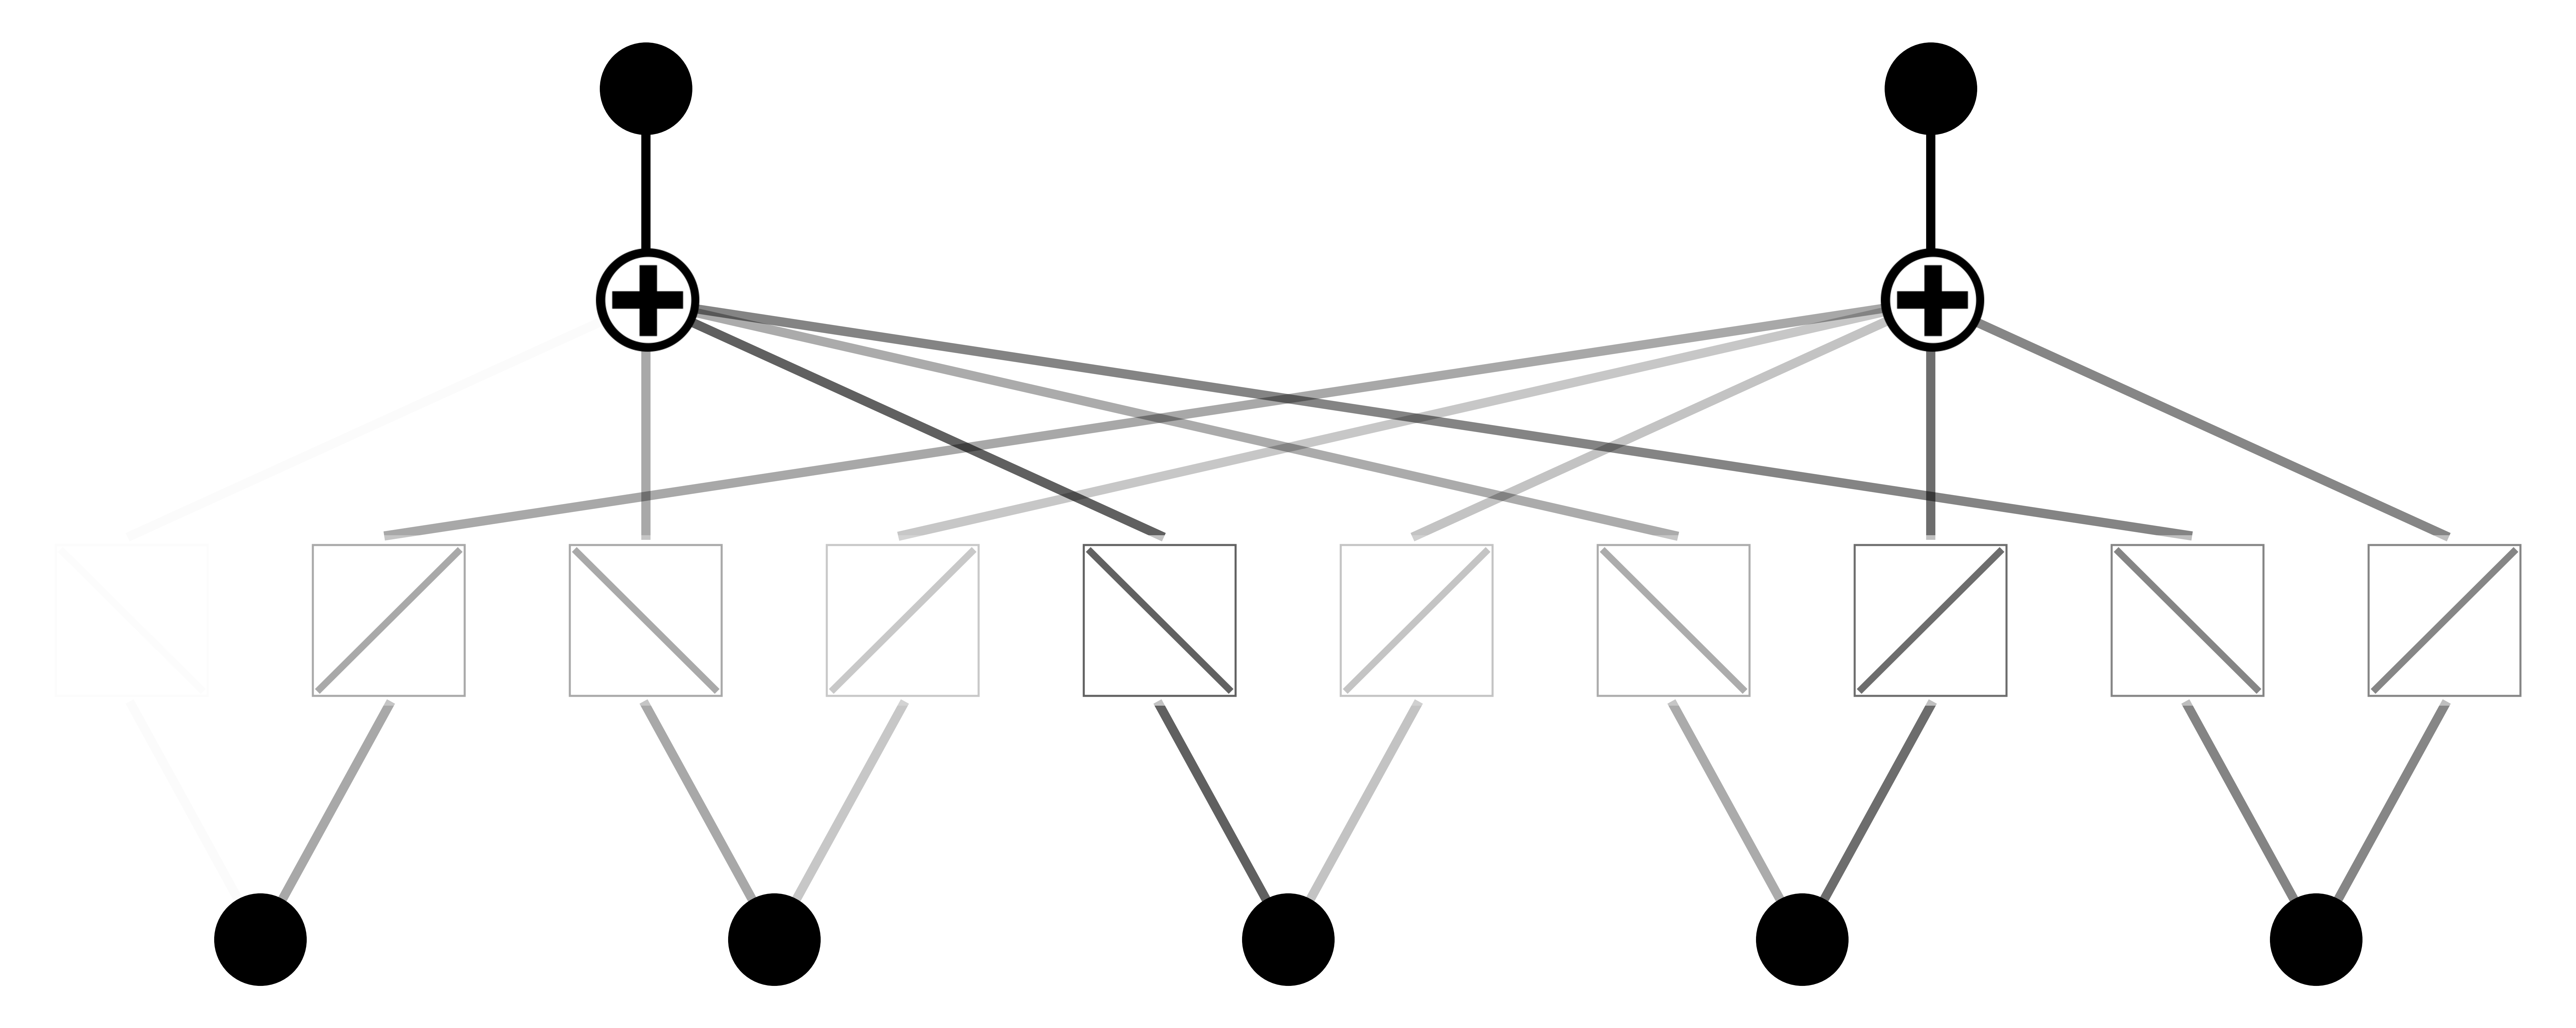

In [71]:
# Plotting KAN network
model.plot(scale=10)

In [74]:
# KAN Experiments

In [86]:
# Update train_acc and test_acc to accept tensors
def train_acc(model, train_input_tensor, train_label_tensor):
    preds = torch.argmax(model(train_input_tensor), dim=1)
    return torch.mean((preds == train_label_tensor).float())

def test_acc(model, test_input_tensor, test_label_tensor):
    preds = torch.argmax(model(test_input_tensor), dim=1)
    return torch.mean((preds == test_label_tensor).float())

In [108]:
model = KAN(width=[5, 2], grid=6, k=12)

def train_model(model, train_input, train_label, test_input, test_label, steps=1, loss_fn=torch.nn.CrossEntropyLoss(), opt="LBFGS"):
    optimizer = torch.optim.LBFGS(model.parameters())

    # Convert NumPy arrays to PyTorch tensors
    train_input_tensor = torch.tensor(train_input, dtype=torch.float32)
    train_label_tensor = torch.tensor(train_label, dtype=torch.long)
    test_input_tensor = torch.tensor(test_input, dtype=torch.float32)
    test_label_tensor = torch.tensor(test_label, dtype=torch.long)

    for step in range(steps):
        def closure():
            optimizer.zero_grad()
            outputs = model(train_input_tensor)  # Use the tensor here
            loss = loss_fn(outputs, train_label_tensor)
            loss.backward()
            return loss

        optimizer.step(closure)

        # Calculate and log metrics (update to use tensors)
        train_accuracy = train_acc(model, train_input_tensor, train_label_tensor)
        test_accuracy = test_acc(model, test_input_tensor, test_label_tensor)
        # print(f"Step {step + 1}/{steps}, Train Accuracy: {train_accuracy}, Validation Accuracy: {val_accuracy}")


# Train the model
train_model(model, train_input, train_label, test_input, test_label, steps=150, loss_fn=torch.nn.CrossEntropyLoss(), opt="LBFGS")

# Predictions of train val and test datasets
test_preds = torch.argmax(model.forward(test_input).detach(),dim=1)
test_labels = test_label

train_preds = torch.argmax(model.forward(train_input).detach(),dim=1)
train_labels = train_label


# Evaluate metrics

print("Train ACC:", accuracy_score(train_labels.numpy(), train_preds.numpy()))

print("Test ACC:", accuracy_score(test_labels.numpy(), test_preds.numpy()))

checkpoint directory created: ./model
saving model version 0.0


<ipython-input-108-3d26bbff441a>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_input_tensor = torch.tensor(train_input, dtype=torch.float32)
<ipython-input-108-3d26bbff441a>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_label_tensor = torch.tensor(train_label, dtype=torch.long)
<ipython-input-108-3d26bbff441a>:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_input_tensor = torch.tensor(test_input, dtype=torch.float32)
<ipython-input-108-3d26bbff441a>:10: UserWarning: To copy construct from a tensor, it is recommende

Train ACC: 0.8626692456479691
Test ACC: 0.925


In [109]:
# Generate the classification reports
train_report = classification_report(train_labels.numpy(), train_preds.numpy())
test_report = classification_report(test_labels.numpy(), test_preds.numpy())

# Print the classification reports
print("Training Classification Report:\n", train_report)
print("Testing Classification Report:\n", test_report)


Training Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.92      0.91       383
           1       0.75      0.70      0.73       134

    accuracy                           0.86       517
   macro avg       0.82      0.81      0.82       517
weighted avg       0.86      0.86      0.86       517

Testing Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96       135
           1       0.78      0.72      0.75        25

    accuracy                           0.93       160
   macro avg       0.87      0.84      0.85       160
weighted avg       0.92      0.93      0.92       160



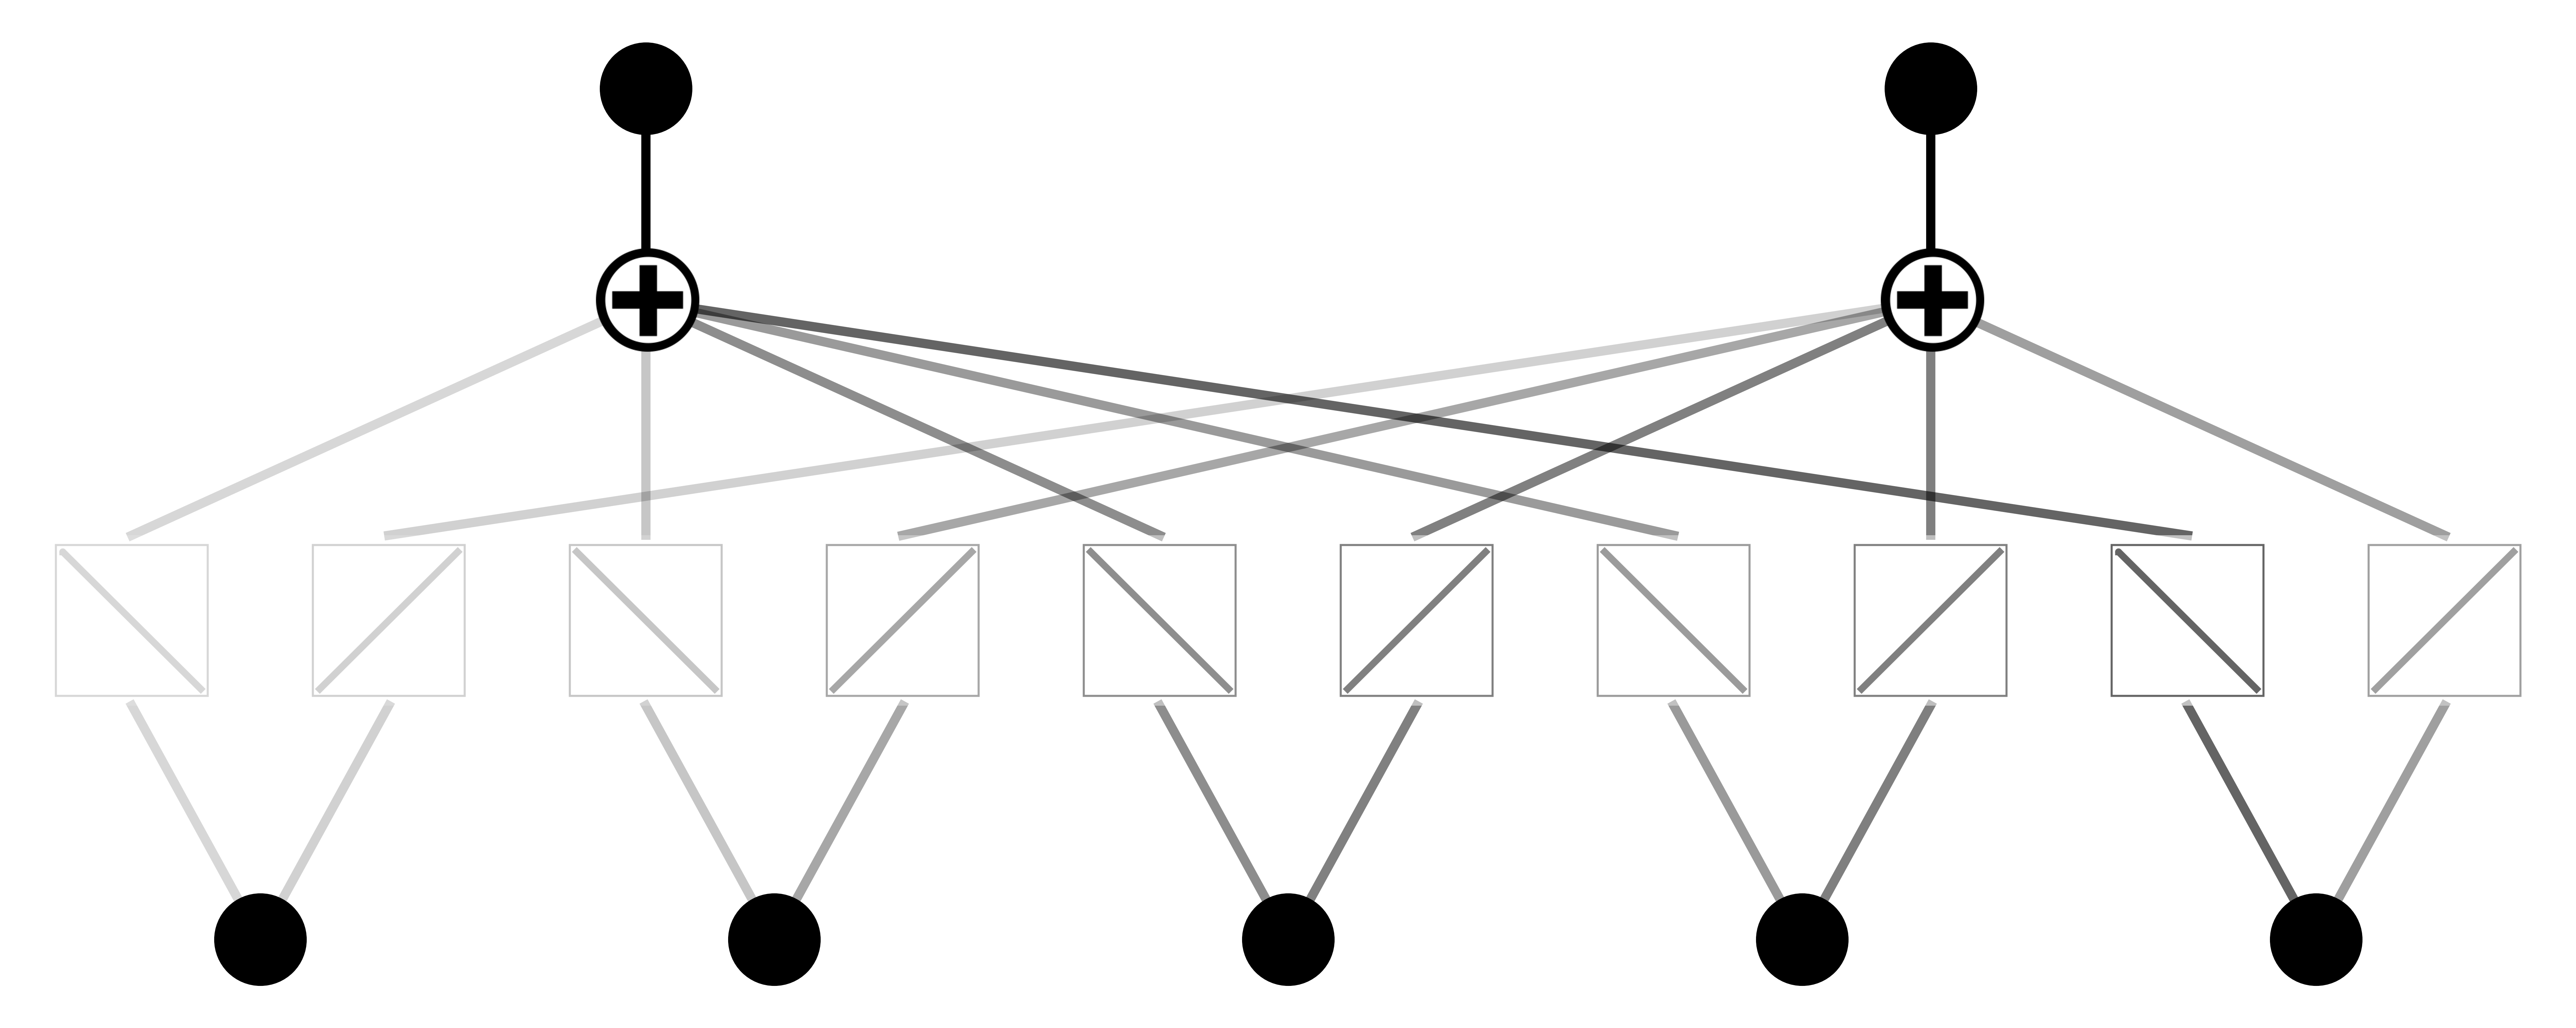

In [111]:
# Plotting KAN network
model.plot(scale=10)

In [134]:
# XAI With KAN

In [112]:
!pip install shap

In [113]:
import shap

In [123]:
# Define the function to use SHAP with your model
def shap_values_for_model(model, X_train_scaled):
    # Initialize SHAP explainer for a neural network

    # test_preds = torch.argmax(model.forward(test_input).detach(),dim=1)
    # train_preds = torch.argmax(model.forward(train_input).detach(),dim=1)

    explainer = shap.KernelExplainer(model.predict, X_train_scaled)  # Use your model's predict function

    # Get SHAP values for the input dataset
    shap_values = explainer.shap_values(X_train_scaled)  # Getting SHAP values for X_train_scaled

    return shap_values

# Define a function to visualize SHAP values
def visualize_shap_values(shap_values, X_train_scaled):
    # Plot summary of SHAP values (which feature has the largest effect)
    shap.summary_plot(shap_values, X_train_scaled)

# Compute SHAP values for your model
shap_values = shap_values_for_model(model, X_train_scaled)

# Visualize SHAP values
visualize_shap_values(shap_values, X_train_scaled)


AttributeError: 'MultKAN' object has no attribute 'predict'

In [119]:
# Function to use SHAP with the model's predictions
def shap_values_for_model(model, X_train_scaled, train_preds):
    # Create a function that can provide the model's predictions
    def model_predict(X):
        # Convert the data to tensor, run through the model and return the predictions
        with torch.no_grad():
            model.eval()  # Set the model to evaluation mode
            X_tensor = torch.tensor(X, dtype=torch.float32)  # Convert to tensor
            outputs = model(X_tensor)  # Get raw outputs from the model
            probabilities = torch.softmax(outputs, dim=1)  # Convert outputs to probabilities (if multi-class)
        return probabilities.numpy()  # Return numpy array of predictions

    # Initialize SHAP KernelExplainer with the model's predict function
    explainer = shap.KernelExplainer(model_predict, X_train_scaled)  # Use the model's prediction function

    # Get SHAP values for the training dataset
    shap_values = explainer.shap_values(X_train_scaled)  # Getting SHAP values for X_train_scaled

    return shap_values

# Define a function to visualize SHAP values
def visualize_shap_values(shap_values, X_train_scaled):
    # Plot summary of SHAP values (which feature has the largest effect)
    shap.summary_plot(shap_values, X_train_scaled)

# Assuming X_train_scaled is the scaled version of your train dataset
# Get SHAP values for your model
shap_values = shap_values_for_model(model, X_train_scaled, train_preds)

# Visualize SHAP values
visualize_shap_values(shap_values, X_train_scaled)

# Predictions of train, val, and test datasets
test_preds = torch.argmax(model.forward(test_input).detach(), dim=1)
test_labels = test_label

train_preds = torch.argmax(model.forward(train_input).detach(), dim=1)
train_labels = train_label

# Evaluate metrics
print("Train ACC:", accuracy_score(train_labels.numpy(), train_preds.numpy()))
print("Test ACC:", accuracy_score(test_labels.numpy(), test_preds.numpy()))

# Generate the classification reports
train_report = classification_report(train_labels.numpy(), train_preds.numpy())
test_report = classification_report(test_labels.numpy(), test_preds.numpy())

# Print the classification reports
print("Training Classification Report:\n", train_report)
print("Testing Classification Report:\n", test_report)


  0%|          | 0/640 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
# Function to use SHAP with the model's predictions
def shap_values_for_model(model, X_train_scaled, train_preds):
    # Create a function that can provide the model's predictions
    def model_predict(X):
        # Convert the data to tensor, run through the model and return the predictions
        with torch.no_grad():
            model.eval()  # Set the model to evaluation mode
            X_tensor = torch.tensor(X, dtype=torch.float32)  # Convert to tensor
            outputs = model(X_tensor)  # Get raw outputs from the model
            probabilities = torch.softmax(outputs, dim=1)  # Convert outputs to probabilities (if multi-class)
        return probabilities.numpy()  # Return numpy array of predictions

    # Initialize SHAP KernelExplainer with the model's predict function
    explainer = shap.KernelExplainer(model_predict, X_train_scaled)  # Use the model's prediction function

    # Get SHAP values for the training dataset
    shap_values = explainer.shap_values(X_train_scaled)  # Getting SHAP values for X_train_scaled

    return shap_values

# Define a function to visualize SHAP values
def visualize_shap_values(shap_values, X_train_scaled):
    # Plot summary of SHAP values (which feature has the largest effect)
    shap.summary_plot(shap_values, X_train_scaled)

# Assuming X_train_scaled is the scaled version of your train dataset
# Get SHAP values for your model
shap_values = shap_values_for_model(model, X_train_scaled, train_preds)

# Visualize SHAP values
visualize_shap_values(shap_values, X_train_scaled)


In [124]:
# Define the function to use SHAP with your model
def shap_values_for_model(model, X_train_scaled):
    # Initialize SHAP explainer for a neural network
    # Instead of passing model.predict, pass the forward function of the model
    # and use the raw outputs (logits) for classification tasks

    def model_predict(inputs):
        # Ensure the input data is a tensor
        inputs_tensor = torch.tensor(inputs, dtype=torch.float32)
        # Get the raw outputs from the model (logits)
        outputs = model(inputs_tensor)
        # Return the raw logits, not the predicted class
        return outputs.detach().numpy()

    # Initialize SHAP explainer with the model's forward function
    explainer = shap.KernelExplainer(model_predict, X_train_scaled)

    # Get SHAP values for the input dataset
    shap_values = explainer.shap_values(X_train_scaled)

    return shap_values

# Define a function to visualize SHAP values
def visualize_shap_values(shap_values, X_train_scaled):
    # Plot summary of SHAP values (which feature has the largest effect)
    shap.summary_plot(shap_values, X_train_scaled)

# Compute SHAP values for your model
shap_values = shap_values_for_model(model, X_train_scaled)

# Visualize SHAP values
visualize_shap_values(shap_values, X_train_scaled)


  0%|          | 0/640 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/kan/MultKAN.py:816: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at /pytorch/aten/src/ATen/native/ReduceOps.cpp:1831.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
/usr/local/lib/python3.11/dist-packages/kan/MultKAN.py:826: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at /pytorch/aten/src/ATen/native/ReduceOps.cpp:1831.)
  input_range = torch.std(preacts, dim=0) + 0.1
/usr/local/lib/python3.11/dist-packages/kan/MultKAN.py:827: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at /pytorch/aten/src/ATen/native/ReduceOps.cpp:1831.)
  output_range_spline = torch.std(posta

KeyboardInterrupt: 

In [133]:
# Define the function to use SHAP with your model for one sample
def shap_values_for_model(model, X_train_scaled_single):
    # Initialize SHAP explainer for a neural network
    # Instead of passing model.predict, pass the forward function of the model
    # and use the raw outputs (logits) for classification tasks

    def model_predict(inputs):
        # Ensure the input data is a tensor
        inputs_tensor = torch.tensor(inputs, dtype=torch.float32)
        # Get the raw outputs from the model (logits)
        outputs = model(inputs_tensor)
        # Return the raw logits, not the predicted class
        return outputs.detach().numpy()

    # Initialize SHAP explainer with the model's forward function
    explainer = shap.KernelExplainer(model_predict, X_train_scaled_single)

    # Get SHAP values for the input dataset (for a single sample)
    shap_values = explainer.shap_values(X_train_scaled_single)

    return shap_values

# Define a function to visualize SHAP values
def visualize_shap_values(shap_values, X_train_scaled_single):
    # Plot summary of SHAP values (which feature has the largest effect)
    shap.summary_plot(shap_values, X_train_scaled_single)

# Select a single sample from X_train_scaled (e.g., the first row)
X_train_scaled_single = X_train_scaled[:100]  # Select the first sample

# Compute SHAP values for the single sample
shap_values = shap_values_for_model(model, X_train_scaled_single)

# Visualize SHAP values
visualize_shap_values(shap_values, X_train_scaled_single)


  0%|          | 0/100 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/kan/MultKAN.py:816: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at /pytorch/aten/src/ATen/native/ReduceOps.cpp:1831.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
/usr/local/lib/python3.11/dist-packages/kan/MultKAN.py:826: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at /pytorch/aten/src/ATen/native/ReduceOps.cpp:1831.)
  input_range = torch.std(preacts, dim=0) + 0.1
/usr/local/lib/python3.11/dist-packages/kan/MultKAN.py:827: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at /pytorch/aten/src/ATen/native/ReduceOps.cpp:1831.)
  output_range_spline = torch.std(posta

KeyboardInterrupt: 